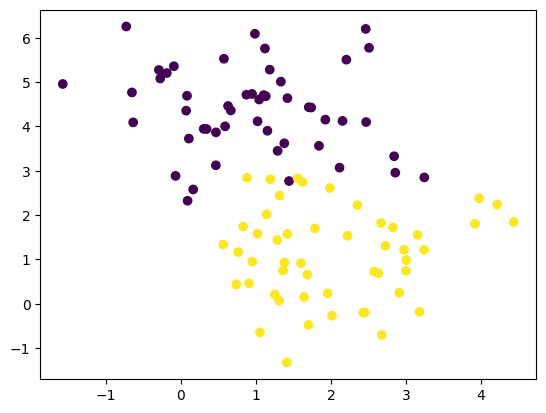

In [11]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import numpy as np
from sklearn.metrics import accuracy_score

x,y = make_blobs(n_samples=100,n_features=2,centers=2,random_state=0)
y=y.reshape(y.shape[0],1)
plt.scatter(x[:,0],x[:,1],c=y)

In [42]:
def initialisation(x) :
    w = np.random.randn(x.shape[1],1)
    b = np.random.randn(1)
    return w,b
def model(x,w,b):
    z = x.dot(w) + b
    a = 1 / (1 + np.exp(-z))
    return a
def log_loss(A,y):
    return -1 / y.shape[0] * np.sum((y*np.log(A)) + (1-y)*np.log(1-A))
def gradients(A,x,y):
    dW = 1/y.shape[0] * np.dot(x.T,A-y)
    db = 1/y.shape[0] * np.sum(A-y)
    return dW,db
def update(w,b,dw,db,learning_rate):
    w = w - learning_rate * dw
    b = b - learning_rate * db
    return w,b
def predict(x,w,b):
    A = model(x,w,b)
    return A >= 0.5
def perceptron(x,y,learning_rate = 0.1 , n_iter = 100):
    loss_eval = []
    W,b = initialisation(x)
    for i in range(n_iter):
        A = model(x,W,b)
        loss = log_loss(A,y)
        dW , db = gradients(A,x,y)
        W,b = update(W,b,dW,db,learning_rate)
        loss_eval.append(loss)

    y_pred = predict(x,W,b)
    print(accuracy_score(y_true=y,y_pred=y_pred))
    plt.plot(loss_eval)
    return W,b

0.93


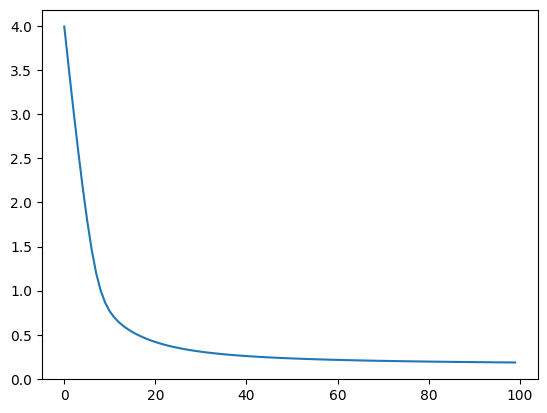

In [53]:
W,b = perceptron(x,y)

New point class prediction

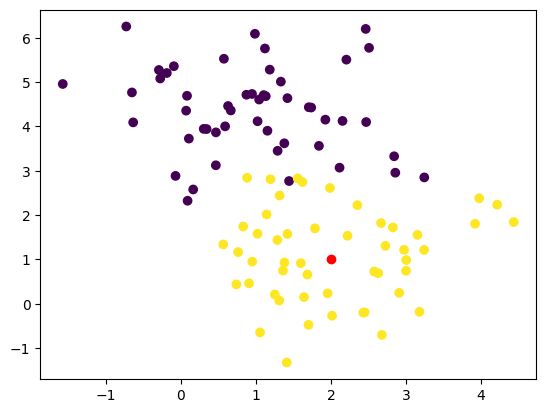

array([ True])

In [54]:
new_example = np.array([2,1])
plt.scatter(x[:,0],x[:,1],c=y)
plt.scatter(new_example[0],new_example[1],c='r')
plt.show()
predict(new_example,W,b)

Separation Line

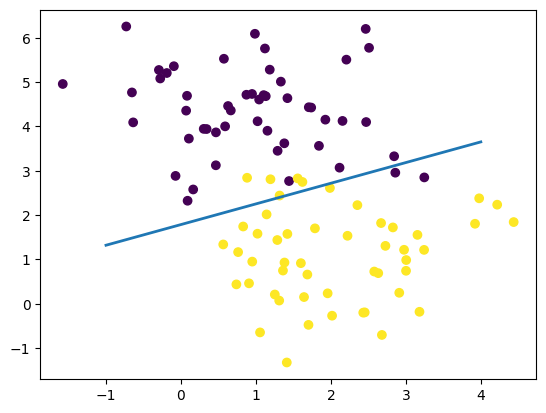

In [59]:
separation_lineX = np.linspace(-1,4,50)
separation_lineY = (-W[0]*separation_lineX - b ) / W[1]
plt.scatter(x[:,0],x[:,1],c=y)
plt.plot(separation_lineX,separation_lineY,lw=2)